In [1]:
%matplotlib notebook

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Read the data

Note that

* Promoter: 2, 
* Neutral: 1,
* Detractor: 0

In [2]:
# Read the data
data = pd.read_csv('C:/Users/vabalagon/Desktop/Meta/New Workflow/data/2 data for modeling (With PCA).csv')

# Get the features and target variable from the dataframe
X = data.drop(['Survey ID', 'Response Date', 'Likelihood to Recommend'], axis=1).to_numpy()
y = data['Likelihood to Recommend'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, test_size = 0.25, shuffle=True, random_state=42) #, stratify=y_smote

##### Apply SMOTE oversampling technique to the training set

In [4]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Resampled dataset shape Counter({0: 8116, 2: 8116, 1: 8116})


# Decision Tree Model (CART)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [7]:
decision_tree_clf_PCA = DecisionTreeClassifier(criterion='entropy', 
                                               max_depth=5, 
                                               splitter="best", 
                                               random_state=42,
                                               min_samples_leaf=5, 
                                               class_weight='balanced') #, class_weight='balanced'
decision_tree_clf_PCA.fit(X_train_smote, y_train_smote)


print("SMOTE Training set balanced accuracy score:", balanced_accuracy_score(y_train_smote, decision_tree_clf_PCA.predict(X_train_smote))) 
print("Test set balanced accuracy score:", balanced_accuracy_score(y_test, decision_tree_clf_PCA.predict(X_test)))

SMOTE Training set balanced accuracy score: 0.8622063413832759
Test set balanced accuracy score: 0.7998527781169479


##### Accuracy of the classifier on the individual classes

In [8]:
y_pred = decision_tree_clf_PCA.predict(X_test)

for y_i in np.unique(y_test)[::-1]:
    print()
    
    # Find the indices of y_i in the true labels
    indices_i = np.where(y_test == y_i)
    
    # Computes the accuracy
    print('class', y_i, 'Accuracy: ', str(round(np.sum(y_test[indices_i] == y_pred[indices_i])/ len(np.where(y_test==y_i)[0]), 3)))


class 2 Accuracy:  0.923

class 1 Accuracy:  0.596

class 0 Accuracy:  0.88


##### Show the tree

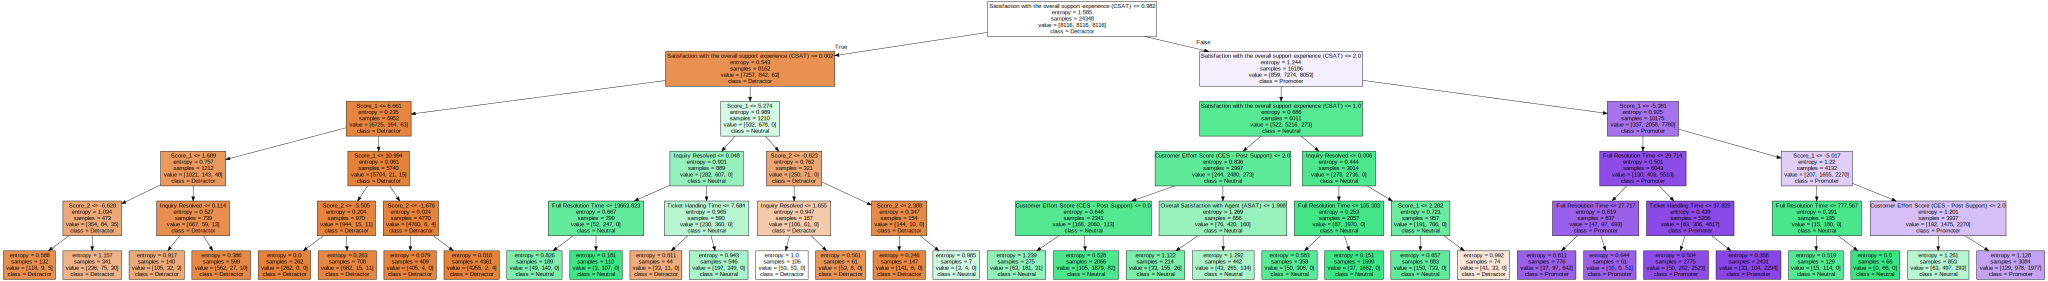

In [9]:
import graphviz
from sklearn import tree

_ = tree.export_graphviz(decision_tree_clf_PCA,
                           feature_names=data.drop(['Survey ID', 'Response Date', 'Likelihood to Recommend'], axis=1).columns,  
                           class_names= ["Detractor", "Neutral", 'Promoter'], #True,#
                           filled=True,
                           out_file=None)

dec_tree = graphviz.Source(_, format="png") 
dec_tree

# Feature importance

In [10]:
# Get the importances of each column 
importances = decision_tree_clf_PCA.feature_importances_

# Arranges the indices such that the importances are arranged in descending order
indices = np.argsort(importances)[::-1]

# Find the corresponding columns
cols_feature_importance = data.drop(['Survey ID', 
                                     'Response Date', 
                                     'Likelihood to Recommend'], axis=1).columns[indices].to_numpy()
print(cols_feature_importance)
cols_feature_importance[0] = 'CSAT'
cols_feature_importance[2] = 'CES'
cols_feature_importance[6] = 'ASAT'

['Satisfaction with the overall support experience (CSAT)' 'Score_1'
 'Customer Effort Score (CES - Post Support)' 'Inquiry Resolved'
 'Full Resolution Time' 'Score_2' 'Ticket Handling Time'
 'Overall Satisfaction with Agent (ASAT)' 'Solved Status']


<IPython.core.display.Javascript object>


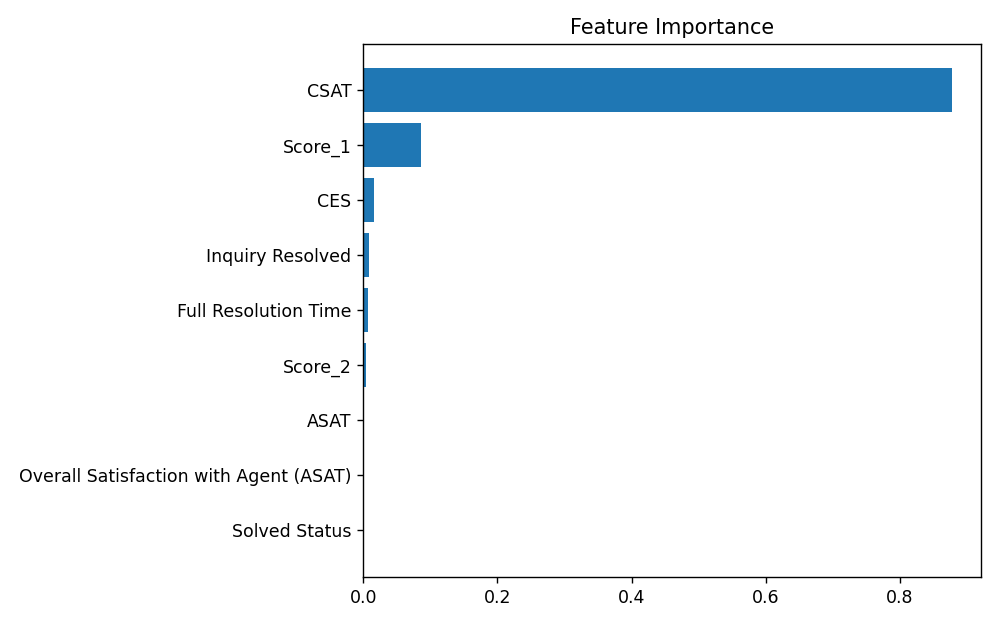

In [11]:
plt.figure(figsize=(8,5))

plt.barh(cols_feature_importance[::-1], importances[indices][::-1])
plt.title('Feature Importance')

plt.tight_layout()